# BTVN 3

Vướng lượng tử & Các thuật toán truy vấn lượng tử

In [18]:
import numpy as np
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

## Bài 1

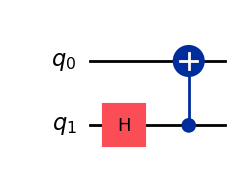

In [19]:
# Vẽ mạch lượng tử
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)

qc.draw(output='mpl')

In [20]:
# Hàm phụ trợ để in trạng thái đẹp hơn (dạng Dirac: a|00> + b|11>)
def format_state(state_vec):
    # Lấy dữ liệu từ điển
    data = state_vec.to_dict()
    terms = []
    for basis_state, amplitude in data.items():
        # Làm tròn số phức để bỏ qua sai số máy tính nhỏ (ví dụ 1e-16j)
        amp = np.round(amplitude, 3) 
        if abs(amp) > 0: # Chỉ in những trạng thái có xác suất > 0
            # Xử lý dấu + để in cho đẹp
            term_str = f"{amp}|{basis_state}>"
            terms.append(term_str)
    return "   ".join(terms)

In [21]:
# Tính toán
inputs = ['00', '01', '10', '11']

for inp in inputs:
    qc = QuantumCircuit(2)
    
    # 1. Khởi tạo trạng thái đầu vào
    # Nếu bit là '1', ta dùng cổng X để lật |0> thành |1>
    if inp[0] == '1':
        qc.x(1)
    if inp[1] == '1':
        qc.x(0)
        
    # 2. Áp dụng mạch H + CNOT
    qc.h(1)      # H lên qubit 1
    qc.cx(1, 0)  # CNOT (control=1, target=0)
    
    # 3. Xem kết quả
    state = Statevector(qc)
    pretty_output = format_state(state)
    print(f"|{inp}>      | {pretty_output}")

|00>      | (0.707+0j)|00>   (0.707+0j)|11>
|01>      | (0.707+0j)|01>   (0.707+0j)|10>
|10>      | (0.707+0j)|00>   (-0.707+0j)|11>
|11>      | (0.707+0j)|01>   (-0.707+0j)|10>


**Nhận xét:** Mạch này chuyển cơ sở tính toán gồm các trạng thái tách được sang cơ sở Bell gồm các trạng thái vướng.

## Câu 2

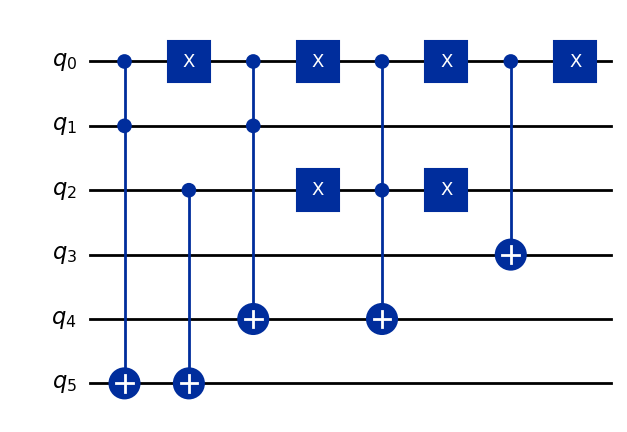

In [26]:
# 3 qubit đầu vào (0, 1, 2) và 3 qubit đầu ra (3, 4, 5)
qc = QuantumCircuit(6)

# 1. Tính F = AB XOR C trên qubit 5
qc.ccx(0, 1, 5)  # Toffoli(A, B, F) -> F = AB
qc.cx(2, 5)      # CNOT(C, F) -> F = AB XOR C

# 2. Tính E = (NOT A)B + A(NOT C) trên qubit 4
# Phần 1: (NOT A)B
qc.x(0)          # NOT A
qc.ccx(0, 1, 4)  # Toffoli(NOT A, B, E) -> E = (NOT A)B
qc.x(0)          # Quay lại A ban đầu

# Phần 2: A(NOT C)
qc.x(2)          # NOT C
qc.ccx(0, 2, 4)  # Toffoli(A, NOT C, E) -> E = (NOT A)B + A(NOT C)
qc.x(2)          # Quay lại C ban đầu

# 3. Tính D = NOT A trên qubit 3
qc.x(0)          # NOT A
qc.cx(0, 3)      # CNOT(A, D) -> D = NOT A
qc.x(0)          # Quay lại A ban đầu

# Vẽ mạch
qc.draw(output='mpl')

In [27]:
# Kiểm tra kết quả câu d
# Trạng thái đầu vào là |ψ>_in = 1/sqrt(3) (|000> + |100> + |111>)
desired_vector = np.zeros(2**6)
desired_vector[[0, 1, 7]] = 1/np.sqrt(3)
qc.initialize(desired_vector, range(6))

# Áp dụng mạch lượng tử đã xây dựng
# 1. Tính F = AB XOR C trên qubit 5
qc.ccx(0, 1, 5)  # Toffoli(A, B, F) -> F = AB
qc.cx(2, 5)      # CNOT(C, F) -> F = AB XOR C

# 2. Tính E = (NOT A)B + A(NOT C) trên qubit 4
# Phần 1: (NOT A)B
qc.x(0)          # NOT A
qc.ccx(0, 1, 4)  # Toffoli(NOT A, B, E) -> E = (NOT A)B
qc.x(0)          # Quay lại A ban đầu

# Phần 2: A(NOT C)
qc.x(2)          # NOT C
qc.ccx(0, 2, 4)  # Toffoli(A, NOT C, E) -> E = (NOT A)B + A(NOT C)
qc.x(2)          # Quay lại C ban đầu

# 3. Tính D = NOT A trên qubit 3
qc.x(0)          # NOT A
qc.cx(0, 3)      # CNOT(A, D) -> D = NOT A
qc.x(0)          # Quay lại A ban đầu

state = Statevector(qc)
pretty_output = format_state(state)
print(f"Trạng thái đầu ra |ψ>_out: | {pretty_output}")

Trạng thái đầu ra |ψ>_out: | (0.577+0j)|000111>   (0.577+0j)|001000>   (0.577+0j)|010001>
